# 訓練紀錄

plot traing log

In [61]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath

outDir = "'outputs'"

In [62]:
def plot_logs(log_path, fields=('class_error', 'loss_bbox_unscaled', 'mAP')):
    '''
    Function to plot specific fields from training log(s). Plots both training and test results.

    :: Inputs - logs = list containing Path objects, each pointing to individual dir with a log file
              - fields = which results to plot from each log file - plots both training and test for each field.
              - ewm_col = optional, which column to use as the exponential weighted smoothing of the plots
              - log_name = optional, name of log file if different than default 'log.txt'.

    :: Outputs - matplotlib plots of results in fields, color coded for each log file.
               - solid lines are training results, dashed lines are test results.

    '''
    # if type(log_path)!=str:
    #     log_path=str(log_path)
    if type(log_path)!=Path:
        log_path=Path(log_path)
    assert log_path.exists()==True
    df = pd.read_json(log_path, lines=True)
    # print(df)

    fig, axs = plt.subplots(ncols=len(fields), figsize=(16, 5))

    for ax, field in zip(axs, fields):
        if field=='mAP':
            coco_eval = pd.DataFrame(
                np.stack(df.test_coco_eval_bbox.dropna().values)[:, 1]
            ).ewm().mean()
            ax.plot(y=coco_eval)
        else:
            ax.set_title(field)
            # ax.plot(y=[dfs[f'train_{field}'], dfs[f'test_{field}']])
            df.plot('epoch', y=[f'train_{field}', f'test_{field}'], ax=ax)
    plt.show()

In [63]:
fields = ('loss', 'class_error', 'loss_bbox','loss_giou', 'loss_ce')
# fields = ('loss', 'class_error', 'loss_giou', 'loss_ce')



# fields = ('loss', 'class_error')




log_path = Path(
    r"logs\MEDUSA-resnet50-batch-4-epoch-100_penghu_rghs_fold1\log.txt")

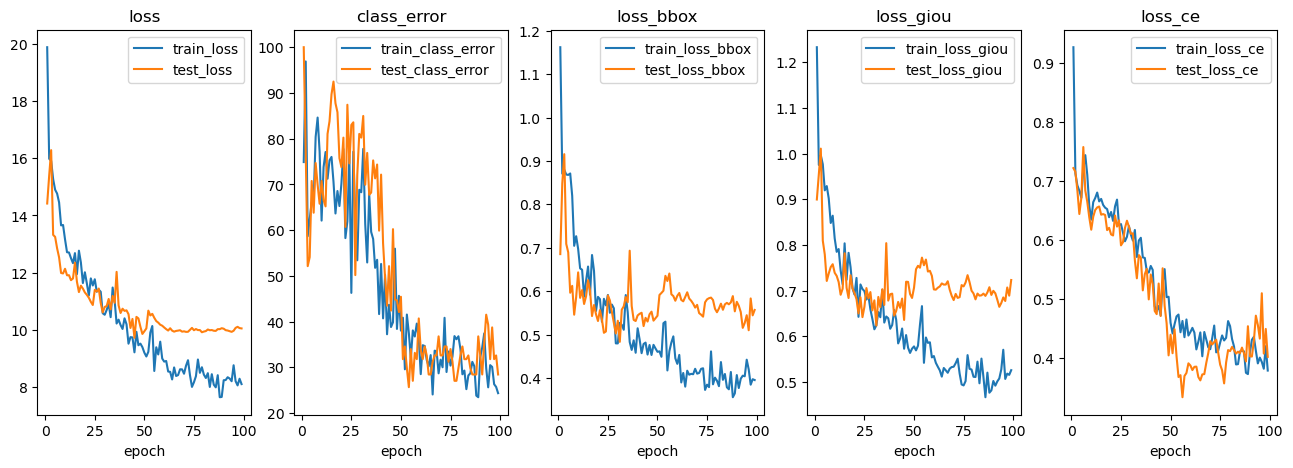

In [64]:
plot_logs(log_path, fields)